# Partial Correlations and Directed Acyclic Graphs

## Generating Artifical Data

In [25]:
import random
import numpy as np
import pandas as pd

length = 10000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5

#make a list for each col

In [2]:
lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))
    
lst_dct

{'P': [21.995736044900234,
  24.98506042869731,
  27.703019832760333,
  26.015431608427615,
  23.12924013110283,
  26.646791752501017,
  27.303867152231472,
  23.352940466228883,
  27.987682428991185,
  24.484055912384328,
  27.383597184984627,
  21.003202471975168,
  25.436734645349887,
  33.06872456309809,
  24.214214102443105,
  24.607111469023252,
  23.943114368854214,
  23.824610404640396,
  21.64211207630217,
  25.216409380582114,
  28.417146586272416,
  21.49366429638104,
  25.18783156026481,
  24.379618215297683,
  28.02930535628413,
  20.17138365412283,
  24.532493829822858,
  27.55867959813329,
  25.647268905512227,
  26.757859133030365,
  25.205837118166105,
  23.405317755021073,
  23.18666818317882,
  25.045607077646178,
  23.474023924692133,
  24.775799804323793,
  24.75688104811518,
  21.86383908250561,
  21.72116434769962,
  28.53482807517721,
  23.05752885467788,
  27.039732940607976,
  19.51526110087324,
  24.601258872166145,
  25.166499179004358,
  26.726428424335445,

In [3]:
#we have our dataframe df

df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,21.995736,54.899553,157.089226,-45.152102,377.993193
1,24.985060,46.960473,145.642036,-44.758741,352.490072
2,27.703020,52.286819,157.943330,-58.441136,409.421893
3,26.015432,41.529034,136.917735,-46.602915,342.836760
4,23.129240,52.045448,165.085978,-45.958021,388.087295
...,...,...,...,...,...
9995,26.855434,49.017596,147.953079,-60.556893,390.720336
9996,26.755174,47.888043,142.901206,-49.181047,366.173782
9997,25.171131,54.357023,159.635645,-56.090500,400.762346
9998,25.316727,56.945699,168.374974,-58.240148,422.515744


end of class 26th Oct 2021

<AxesSubplot:xlabel='Q', ylabel='Z'>

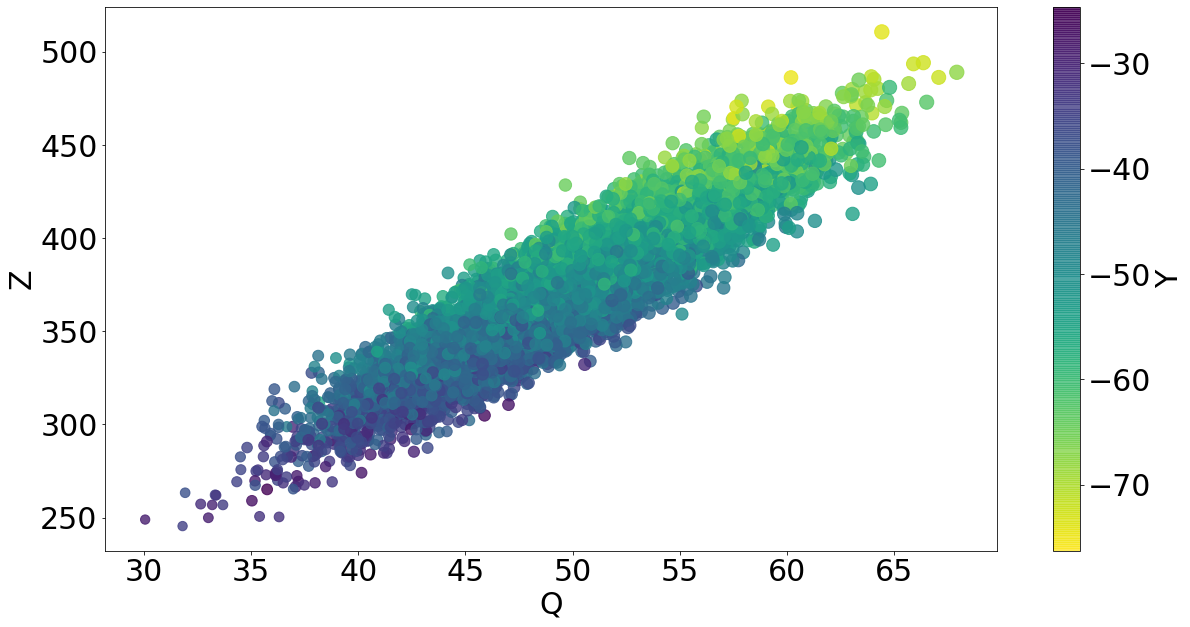

In [26]:
##play around with this

import matplotlib.pyplot as plt
# We can visualize the correlation of these variables on four dimensions:
#     2 dimensions in x-y space, a 3rd dimension using size and a fourth using color


plt.rcParams.update({"font.size":30})
fig, ax = plt.subplots(figsize = (20,10))
df.plot.scatter(x = "Q", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [5]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,0.013775,0.014927,-0.022300,0.160012
Q,0.013775,1.000000,0.947519,-0.703147,0.911500
X,0.014927,0.947519,1.000000,-0.668964,0.932631
Y,-0.022300,-0.703147,-0.668964,1.000000,-0.847234
Z,0.160012,0.911500,0.932631,-0.847234,1.000000


In [27]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     2362.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:18:43   Log-Likelihood:                -19886.
No. Observations:               10000   AIC:                         3.978e+04
Df Residuals:                    9995   BIC:                         3.982e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q             -0.0033      0.012     -0.284      0.7

In [7]:
residuals

,P,Q,X,Y,Z
0,-3.489987,3.361647,-5.998425,5.097538,8.060477
1,1.357813,-1.400103,3.978096,-1.707460,-5.387516
2,1.290639,-0.626122,0.273641,-1.154207,0.105853
3,2.428005,-4.607200,7.345398,-4.041658,-7.692046
4,-1.507486,-1.738669,1.752432,2.124922,2.302347
...,...,...,...,...,...
9995,2.428859,-1.354317,3.091605,-4.728054,-6.172093
9996,0.888839,-0.109113,-0.217154,-0.261565,-0.027281
9997,0.401953,1.179916,-0.433434,-0.880878,-1.332062
9998,-0.541014,1.192797,-1.980515,0.811217,2.683497


In [8]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,-0.01,-0.59,0.63,0.71
Q,-0.01,1.00,0.50,-0.13,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.90
Z,0.71,0.00,0.83,-0.90,1.00


In [28]:
!pip install pinguoin

ERROR: Could not find a version that satisfies the requirement pinguoin
ERROR: No matching distribution found for pinguoin


In [29]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,-0.00,-0.58,0.62,0.70
Q,-0.00,1.00,0.50,-0.13,0.01
X,-0.58,0.50,1.00,0.74,0.83
Y,0.62,-0.13,0.74,1.00,-0.90
Z,0.70,0.01,0.83,-0.90,1.00


In [30]:
!pip install datlib

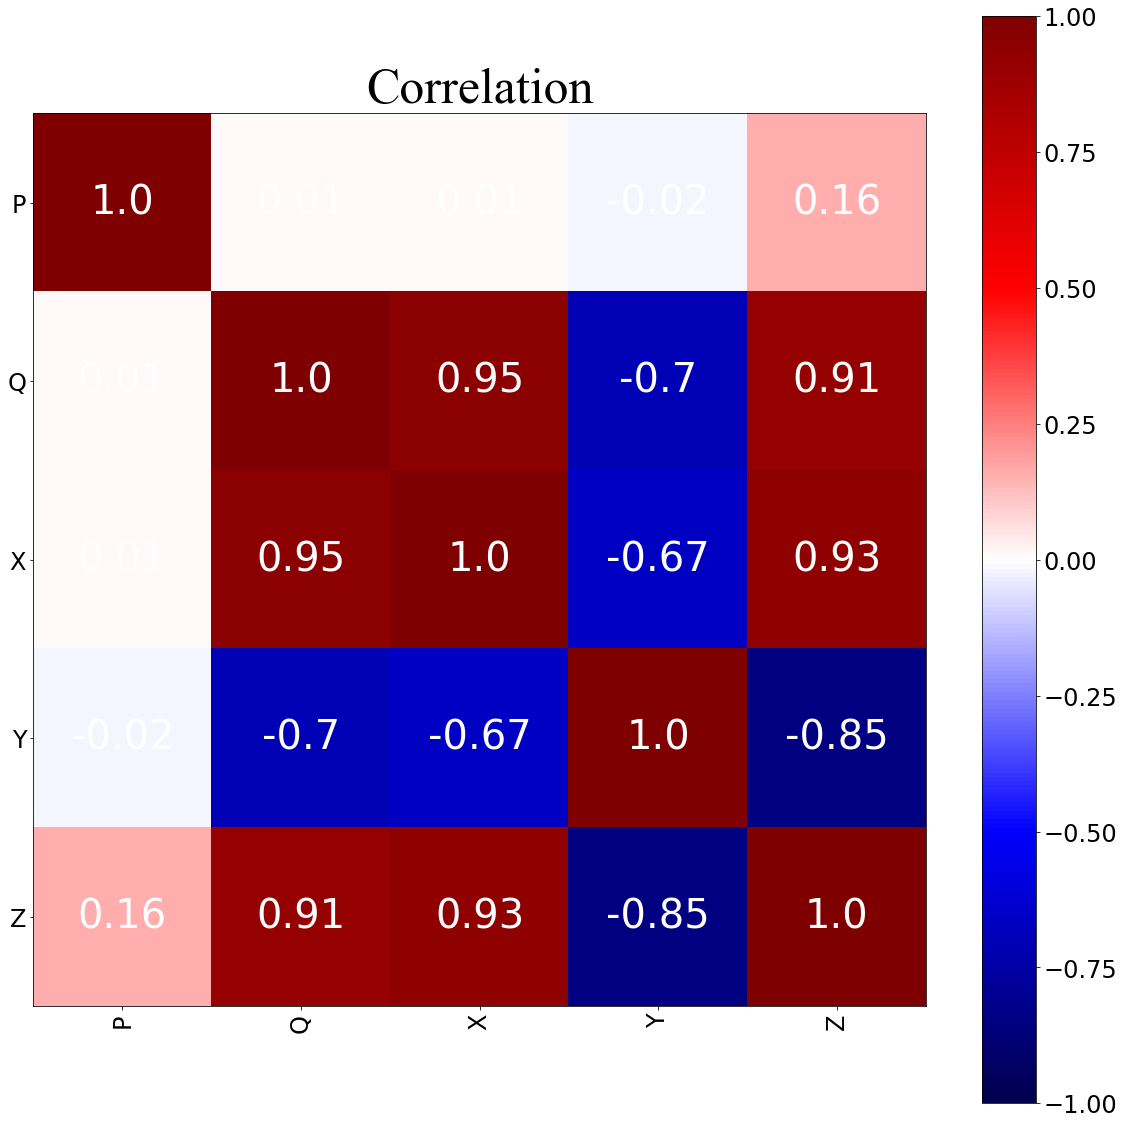

In [12]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None,
                   title = "Correlation")


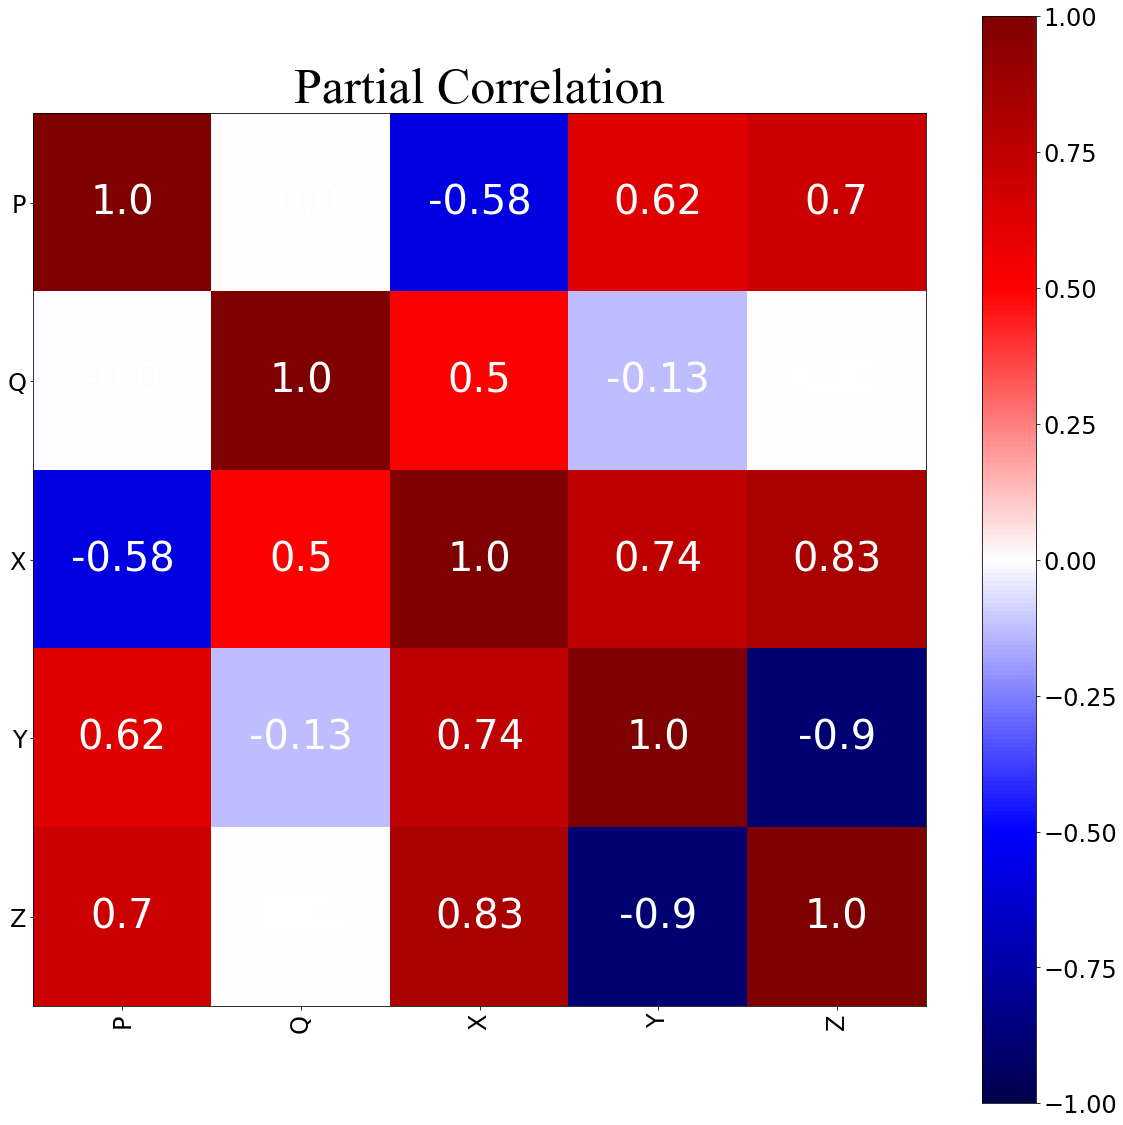

In [31]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None,
                   title = "Partial Correlation")

In [32]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            # regress one residual on the other
            #  save the pvalue for the explanatory variable
            #  this is the pvalue of the partial correlation
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                            0.08079
Date:                Thu, 04 Nov 2021   Prob (F-statistic):                       0.776
Time:                        01:20:24   Log-Likelihood:                         -19886.
No. Observations:               10000   AIC:                                  3.977e+04
Df Residuals:                    9999   BIC:                                  3.978e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,P,Q,X,Y,Z
P,NaN,0.78,0.0,0.0,0.00
Q,0.78,NaN,0.0,0.0,0.53
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.53,0.0,0.0,NaN


In [33]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [38]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

ValueError: list.remove(x): x not in list

NetworkXError: random_state_index is incorrect

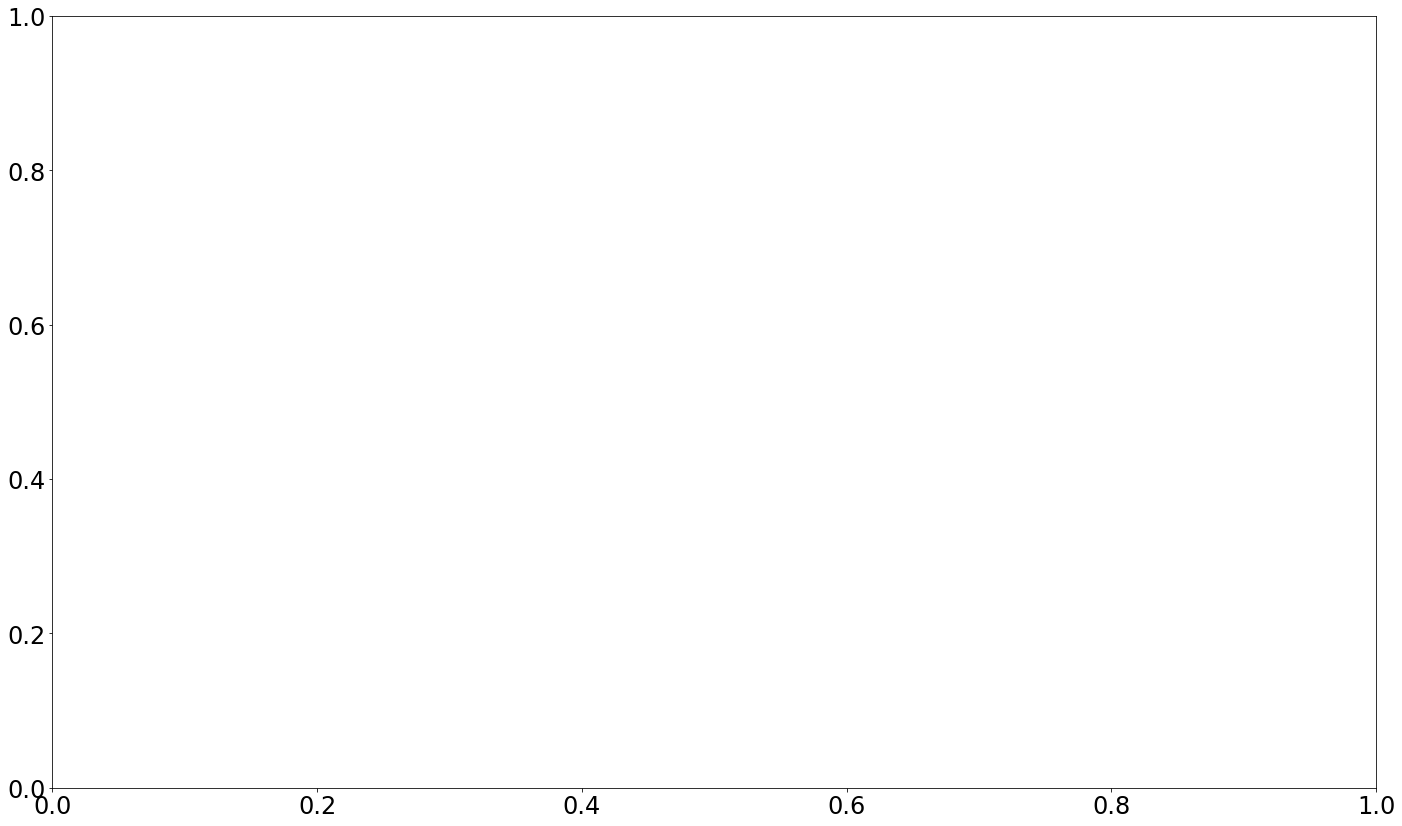

In [35]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1000,
                    # show node label
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                edge_labels = edge_labels,
                                 font_color = "green",
                                 font_size=20)    
    
    plt.show()
    
graph_DAG(undirected_graph, df)

In [36]:
from pgmpy.estimators import PC
c= PC(df)
max_cond_vars = len(df.keys()) - 2
model = c.estimate(return_type = "dag",
                  variant = "parallel", #"orig", "stable"
                  significance = p_val,
                  max_cond_vars = max_cond_vars,
                  ci_test = "pearsonr")
edges = model.edges()
edges

ModuleNotFoundError: No module named 'pgmpy'

In [37]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title=""):
    graph = nx.DiGraph()
    
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        control = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)
        print(edge, keep_controls)
        # build pcorr matrix with nodes from the edge + controls
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr().round(2)
        edge_labels[edge] = str(pcorr.loc[edge[1], edge[0]])
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph,
                    pos,
                    node_color = color_map,
                    node_size = 1200,
                    font_color = "white",
                    font_size = 26,
                    alpha = 1,
                    width = 1,
                    edge_color = "C1",
                    arrowstyle = ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width = .1"))
    
    nx.draw_networkx_edge_labels(graph,
                                pos,
                                edge_labels = edge_labels,
                                font_color = "green",
                                font_size = 20)
    
    plt.show()
graph_DAG(edges, df, title = "Directed Acyclic Graph")

NameError: name 'edges' is not defined